In [66]:
from DataLoader import *
from Visualization import *
from EstimateFundamentalMatrix import *
from EssentialMatrixFromFundamentalMatrix import *
from GetInliersRANSAC import *
from ExtractCameraPose import *
from LinearTriangulation import *
from DisambiguateCameraPose import *
from NonlinearTriangulation import *
import os

# Don't generate pyc codes
sys.dont_write_bytecode = True

In [67]:
dataDirPath = os.getcwd() + '/P3Data/'
images = loadImages(dataDirPath)
# displayImages(images, 5)


In [68]:
K = getCameraParams(dataDirPath)
print(K)

[[531.12215532   0.         407.19255084]
 [  0.         531.5417375  313.30871505]
 [  0.           0.           1.        ]]


In [69]:
featureMatchesList = parseMatchFiles(dataDirPath)

In [70]:
InlierList, OutlierList = ransac(featureMatchesList[0].matchPairs, 2000, 0.01)
matchPairsInliers = [featureMatchesList[0].matchPairs[i] for i in InlierList]
matchPairsOutliers = [featureMatchesList[0].matchPairs[i] for i in OutlierList]


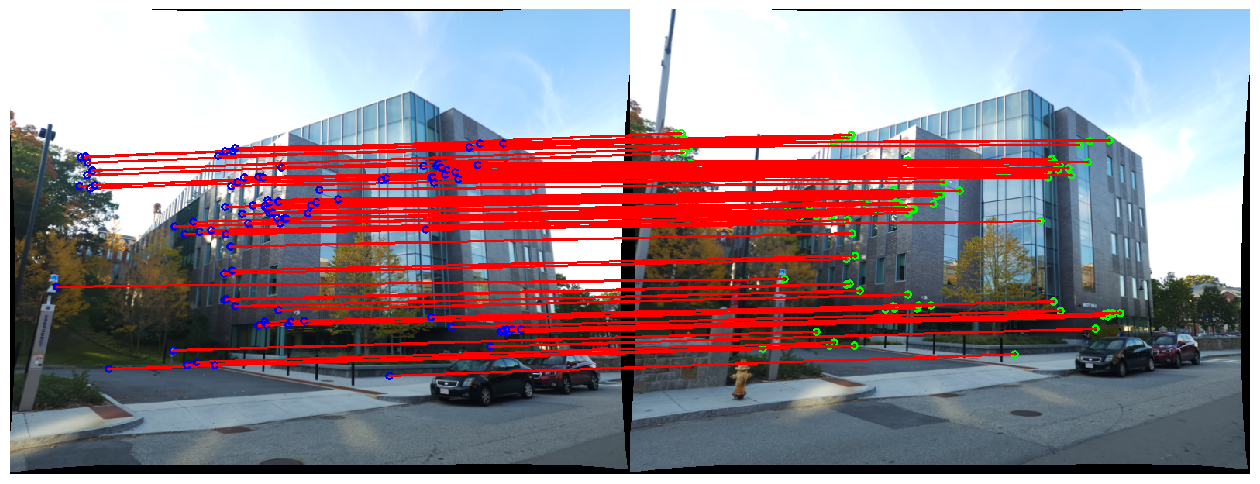

In [71]:
matchImage = drawMatchs(images[0], images[1], matchPairsInliers)

plt.figure(figsize=(16, 8))
plt.axis("off")
plt.imshow(matchImage)
plt.show()

## Final Fundimental Matrix Calculated from inliers

In [72]:
x1s = []
x2s = []
for idx in range(len(matchPairsInliers)):
    x1s.append(matchPairsInliers[idx].coords1)
    x2s.append(matchPairsInliers[idx].coords2)
x1s = np.array(x1s)
x2s = np.array(x2s)

Fest = EstimateFundamentalMatrix(x1s, x2s)
print(Fest)


[[ 6.00073061e-08 -5.81053533e-05  2.28591318e-02]
 [ 6.05926799e-05  5.64865981e-07 -4.67410425e-02]
 [-2.52217727e-02  4.65906394e-02  9.97239140e-01]]


## Estimate Essential Matrix from Fundimental Matrix

In [73]:
Eest = EssentialFromFundamental(Fest, K)
print(Eest)

[[-0.00613034 -0.79512506  0.12516716]
 [ 0.81625332  0.01937684 -0.55702832]
 [-0.15225467  0.59312179  0.01308768]]


## Estimate Camera Pose

In [74]:
Rest, Test = extractCameraPose(Eest)
print(Rest)
print(Test)

[array([[ 9.98996580e-01, -6.52701208e-04,  4.47817624e-02],
       [-8.49668133e-04,  9.99437637e-01,  3.35214523e-02],
       [-4.47784583e-02, -3.35258658e-02,  9.98434227e-01]]), array([[ 9.98996580e-01, -6.52701208e-04,  4.47817624e-02],
       [-8.49668133e-04,  9.99437637e-01,  3.35214523e-02],
       [-4.47784583e-02, -3.35258658e-02,  9.98434227e-01]]), array([[-0.33771811,  0.1489073 ,  0.92939394],
       [ 0.1701411 , -0.96148353,  0.21587364],
       [ 0.92574212,  0.23103255,  0.29937515]]), array([[-0.33771811,  0.1489073 ,  0.92939394],
       [ 0.1701411 , -0.96148353,  0.21587364],
       [ 0.92574212,  0.23103255,  0.29937515]])]
[array([0.59335633, 0.15190294, 0.79047692]), array([-0.59335633, -0.15190294, -0.79047692]), array([0.59335633, 0.15190294, 0.79047692]), array([-0.59335633, -0.15190294, -0.79047692])]


## Triangulation Check for Cheirality Condition

In [75]:
Xest = []
for i in range(len(Rest)):
    X = LinearTriangulation(K, x1s, x2s, np.eye(3), np.zeros((3,1)), Rest[i], Test[i])
    Xest.append(X)

Rest, Test, Xest = disambiguateCameraPose(Rest, Test, Xest)


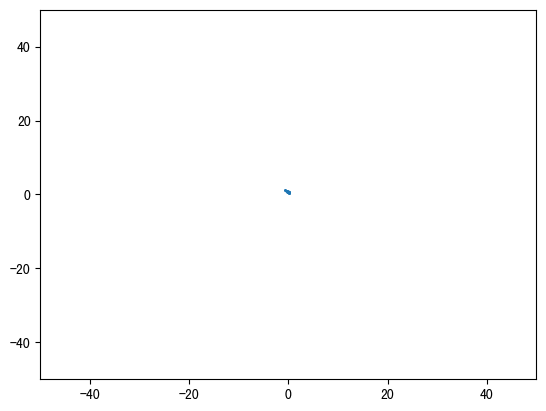

In [76]:
drawWorldPoints([Xest])
# drawWorldPoints(Xest)
# drawWorldPoints([Xest[0]])
# drawWorldPoints([Xest[1]])
# drawWorldPoints([Xest[2]])
# drawWorldPoints([Xest[3]])

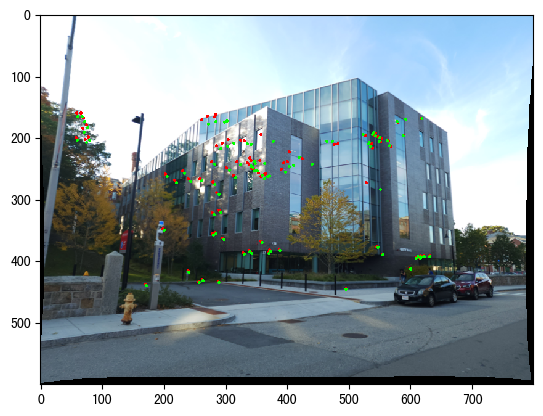

In [77]:
newImage = drawPoints(images[0], x1s, [255, 0, 0])

reprojPoints = reprojection(K, np.eye(3), np.zeros((3,1)), Xest)
newImage = drawPoints(newImage, reprojPoints, [0, 255, 0])

plt.imshow(newImage)
plt.show()

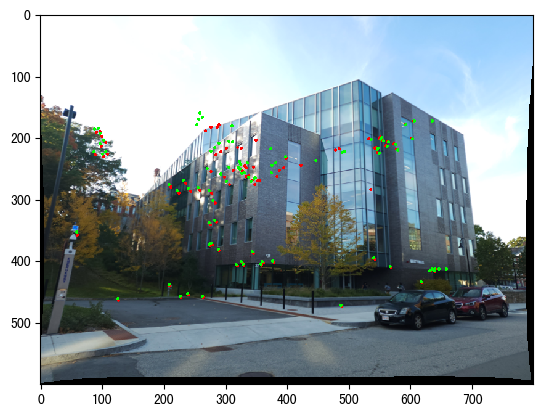

In [78]:
newImage2 = drawPoints(images[1], x2s, [255, 0, 0])

reprojPoints2 = reprojection(K, Rest, Test, Xest)
newImage2 = drawPoints(newImage2, reprojPoints2, [0, 255, 0])

plt.imshow(newImage2)
plt.show()